# SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from os import listdir
from os.path import isfile, join
import random
import shutil
from matplotlib.image import imread
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

from tensorflow.keras.utils import Sequence
import time
import seaborn as sns
import DCGAN1 as gan

C:\Users\15197\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [2]:
IMG_DIR = './PokemonData'
dirs = os.listdir(IMG_DIR)
print(dirs[:5])

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok']


# DATA EXTRACTOR

In [3]:
def files_info_extractor(path):
    dir_list = os.listdir(path)
    y = []
    X = []
    for i in range(len(dir_list)):
        files = os.listdir(os.path.join(path,dir_list[i]))
        for j in range(len(files)):
            X.append([files[j],dir_list[i]])
    return X

In [4]:
x = files_info_extractor(IMG_DIR)
X = pd.DataFrame(x,columns=["file","label"])
X

,file,label
0,0282b2f3a22745f1a436054ea15a0ae5.jpg,Abra
1,06b9eec4827d4d49b1b4c284308708df.jpg,Abra
2,10a9f06ec6524c66b779ea80354f8519.jpg,Abra
3,1788abb8b51f48509cfac8067bd99e14.jpg,Abra
4,28cfad92ad934d1f9b579cbff4b5d012.jpg,Abra
...,...,...
6822,dd387067380e4d1f8672c30d4b567fac.jpg,Zubat
6823,e1997a18e61641a4b0e701f6bc4c70f4.jpg,Zubat
6824,e6cba9a117d64d849fcc389e04e92e11.jpg,Zubat
6825,f8788465c10a4ab8bb0aeb992ec060ce.jpg,Zubat


In [5]:
def create_train_val_test_folder():
    os.system("mkdir train")
    os.system("mkdir test")
    os.system("mkdir val")
def clean_images():
    os.system("rm -r train/* test/* val/*")
    os.system("find train/ -name '*.*' -type f -delete")
    os.system("find val/ -name '*.*' -type f -delete")
    os.system("find test/ -name '*.*' -type f -delete")
def data_extractor(class_pct,train_pct,val_pct,test_pct):
    
    sub_classes = random.sample(dirs,int(len(dirs)*class_pct))
    for cla in sub_classes:
        os.system('mkdir "train/'+cla+'"')
        os.system('mkdir "test/'+cla+'"')
        os.system('mkdir "val/'+cla+'"')
        os.system("find train/"+cla+" -name '*.*' -type f -delete")
        os.system("find val/"+cla+" -name '*.*' -type f -delete")
        os.system("find test/"+cla+" -name '*.*' -type f -delete")
        temp_files = os.listdir(os.path.join(IMG_DIR,cla))
        files = [f for f in temp_files if isfile(os.path.join(IMG_DIR, cla,f))]
        train_files = random.sample(files,int(len(files)*(train_pct+val_pct+test_pct)))
        val_files = random.sample(train_files,int(len(files)*(val_pct+test_pct)))
        test_files = random.sample(val_files,int(len(files)*test_pct))
        train_files = [x for x in train_files if x not in val_files]
        val_files = [x for x in val_files if x not in test_files]
        for file in train_files:
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('train',cla,file))
        for file in val_files:
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('val',cla,file))
        for file in test_files:
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('test',cla,file))

def data_extractor_gan(classes,train_pct, val_pct, test_pct):
    for cla in classes:
        os.system('mkdir "train/'+cla+'"')
        os.system('mkdir "test/'+cla+'"')
        os.system('mkdir "val/'+cla+'"')
        os.system("find train/"+cla+" -name '*.*' -type f -delete")
        os.system("find val/"+cla+" -name '*.*' -type f -delete")
        os.system("find test/"+cla+" -name '*.*' -type f -delete")
        os.system('mkdir "include_gan"')
        os.system('mkdir "include_gan/train/'+cla+'"')
        os.system('mkdir "include_gan/test/'+cla+'"')
        os.system('mkdir "include_gan/val/'+cla+'"')
        os.system("find include_gan/train/"+cla+" -name '*.*' -type f -delete")
        os.system("find include_gan/val/"+cla+" -name '*.*' -type f -delete")
        os.system("find include_gan/test/"+cla+" -name '*.*' -type f -delete")
        temp_files = os.listdir(os.path.join(IMG_DIR,cla))
        files = [f for f in temp_files if isfile(os.path.join(IMG_DIR, cla,f))]
        train_files = random.sample(files,int(len(files)*(train_pct+val_pct+test_pct)))
        val_files = random.sample(train_files,int(len(files)*(val_pct+test_pct)))
        test_files = random.sample(val_files,int(len(files)*test_pct))
        train_files = [x for x in train_files if x not in val_files]
        val_files = [x for x in val_files if x not in test_files]
        for file in train_files:
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('include_gan','train',cla,file))
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('train',cla,file))
        for file in val_files:
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('include_gan','val',cla,file))
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('val',cla,file))
        for file in test_files:
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('include_gan','test',cla,file))
            shutil.copy(os.path.join(IMG_DIR,cla,file), os.path.join('test',cla,file))
        temp_files = os.listdir(os.path.join("savedData",cla))
        files = [f for f in temp_files if isfile(os.path.join("savedData", cla,f))]
        for file in files:
            shutil.copy(os.path.join("savedData",cla,file), os.path.join("include_gan",'train',cla,file))



In [39]:
gan_test_class = ["Arbok","Bulbasaur","Caterpie","Charizard","Cloyster","Cubone","Dewgong","Ditto","Dodrio","Dragonite","Dratini","Ekans"]

In [40]:
data_extractor_gan(gan_test_class,0.7,0.2,0.1)

In [ ]:
create_train_val_test_folder()
#clean_images()
data_extractor(1,0.7,0.2,0.1)

# USE GAN MODEL TO GENERATE MORE IMAGES

C:\Users\15197\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


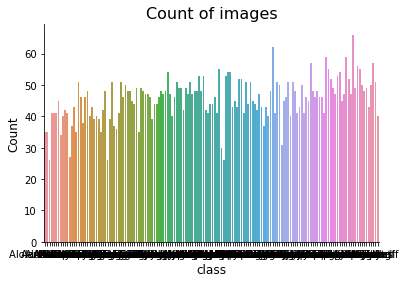

In [6]:
plt.title('Count of images', size=16)
sns.countplot(X["label"])
plt.ylabel('Count', size=12)
plt.xlabel('class', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [8]:
class_names = X["label"].unique()
max_num = X["label"].value_counts()

In [15]:
os.system("mkdir savedData")
for cla in class_names:
    os.system("mkdir savedData/"+cla)

In [9]:
class_names

array(['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok',
       'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise',
       'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard',
       'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster',
       'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo',
       'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee',
       'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor',
       'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude',
       'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler',
       'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan',
       'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon',
       'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan',
       'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp',
       'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton',
     

In [10]:
pokemon_class = ["Cloyster"]

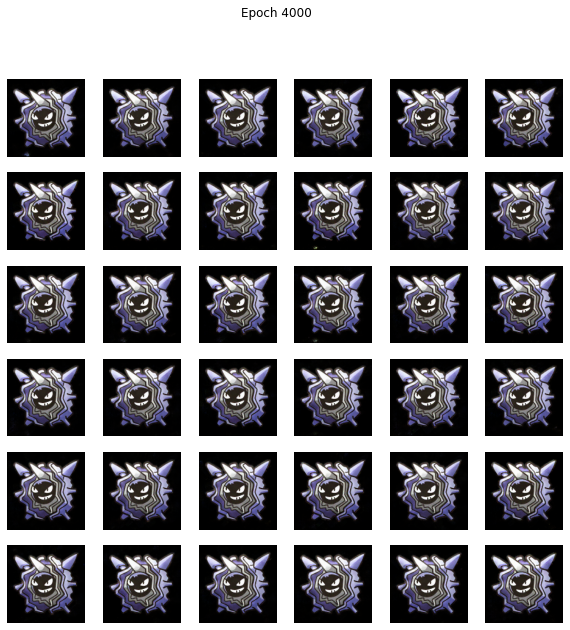

Lossy conversion from float32 to uint8. Range [0.084503173828125, 254.77975463867188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.080078125, 254.74803161621094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.081756591796875, 254.670654296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0805816650390625, 254.70956420898438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0800018310546875, 254.97531127929688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0800018310546875, 254.81719970703125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0800018310546875, 254.724609375]. Convert im

In [92]:
import DCGAN as gan

for pokemon in pokemon_class:
    train_dataset = gan.create_dataset(os.path.join(IMG_DIR, pokemon) + "/*")
    save = str("./savedData/" + pokemon + "/")
    
    gan.train(train_dataset, epochs=4000, save_after=100, save_URL = save,num=36)

it means that the Generator found a certain mode in the data space tha tis able to continuously fool the Discriminator into thinking he sis seeing real samples instead of fake ones. In other words, it means that the Discriminator is unable to successfullly distinguish real and fake samples coming from that same data mode.

# TAKE A LOOK AT THE DATASET

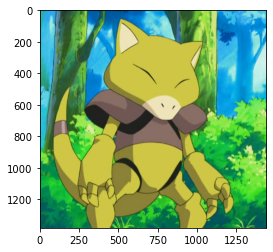

In [11]:
test_path = 'PokemonData/Abra/4e554e4a0f624656a7b1542b679b6157.jpg'
plt.imshow(imread(test_path))

# DATA AUGMATION USING ImageDataGenerator

C:\Users\15197\AppData\Roaming\Python\Python39\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


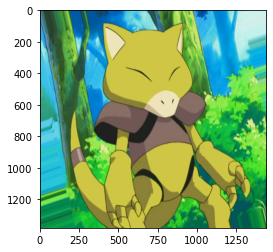

In [12]:
from keras.preprocessing.image import ImageDataGenerator

baselineDataGen = ImageDataGenerator()
rotateDataGen = ImageDataGenerator(rotation_range=40)
rescaleDataGen = ImageDataGenerator(rescale = 1./255)
zcaDataGen = ImageDataGenerator(zca_whitening=True)
zoomDataGen = ImageDataGenerator(zoom_range=0.5)
allDataGen = ImageDataGenerator(rotation_range=20,
                               rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               vertical_flip = True,
                               fill_mode='nearest')

plt.imshow(baselineDataGen.random_transform(imread(test_path)))
plt.imshow(rotateDataGen.random_transform(imread(test_path)))
plt.imshow(rescaleDataGen.random_transform(imread(test_path)))
plt.imshow(zcaDataGen.random_transform(imread(test_path)))
plt.imshow(zoomDataGen.random_transform(imread(test_path)))
plt.imshow(allDataGen.random_transform(imread(test_path)))


In [13]:

image_shape = (256,256,3)


def generateDataFromDirectory(dg):
    train = dg.flow_from_directory('train/',target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=15,
                                                class_mode='categorical')
    test = dg.flow_from_directory('test/',target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=15,
                                                class_mode='categorical')
    val = dg.flow_from_directory('val/',target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=15,
                                                class_mode='categorical')
    return train, test, val

def generateDataFromDirectory_gan(dg):
    train = dg.flow_from_directory('include_gan/train/',target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=15,
                                                class_mode='categorical')
    test = dg.flow_from_directory('include_gan/test/',target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=15,
                                                class_mode='categorical')
    val = dg.flow_from_directory('include_gan/val/',target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=15,
                                                class_mode='categorical')
    return train, test, val

<h2> create callback_list for building model </h2>

In [14]:
os.system("mkdir saved_models")
filepath = "saved_models/weight-model-improvement-{epoch:02d}-{val_accuracy:.2f}-"+time.strftime("%Y%m%d-%H%M%S")+".h5"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy",verbose=1,save_best_only=True, model="max", save_weights_only=False)
earlystopping = EarlyStopping(monitor="val_loss",patience=15,verbose=1,restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)
log_csv = CSVLogger("my_logs.csv",separator=',', append=False)
callback_list = [checkpoint,earlystopping,log_csv]
callback_list_with_reduction = [checkpoint,earlystopping,log_csv,reduce_lr]

<h2> define function to create baseline model which we use as a baseline to compare with other models </h2>

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


def build_baseline():
    model = Sequential()

    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())

    #model.add(Dense(64,activation='relu'))
    model.add(Dense(12,activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

<h2> define function to compare the original dataset and dataset with gan included </h2>

In [16]:
def compared_with_without_gan():
    historys = []
    train, test, val = generateDataFromDirectory(allDataGen)
    gan_train, gan_test, gan_val = generateDataFromDirectory_gan(allDataGen)
    model = build_baseline()
    gan_model = build_baseline()
    history = model.fit(train, epochs=50, validation_data=val,callbacks=callback_list_with_reduction)
    gan_history = gan_model.fit(gan_train, epochs=50,validation_data=gan_val,callbacks=callback_list_with_reduction)
    historys.append(history)
    historys.append(gan_history)
    loss_history = pd.DataFrame(history.history)
    gan_loss_history = pd.DataFrame(gan_history.history)
    plt.plot(loss_history['val_accuracy'],label="original")
    plt.plot(gan_loss_history['val_accuracy'],label="gan")
    plt.legend()
    plt.show()

Found 324 images belonging to 12 classes.
Found 42 images belonging to 12 classes.
Found 95 images belonging to 12 classes.
Found 757 images belonging to 12 classes.
Found 42 images belonging to 12 classes.
Found 95 images belonging to 12 classes.
Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 6.6032 - accuracy: 0.1327
Epoch 00001: val_accuracy improved from -inf to 0.34737, saving model to saved_models\weight-model-improvement-01-0.35-20211126-001702.h5
22/22 [==============================] - 10s 346ms/step - loss: 6.6032 - accuracy: 0.1327 - val_loss: 2.0429 - val_accuracy: 0.3474 - lr: 0.0010
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 1.8164 - accuracy: 0.4074
Epoch 00002: val_accuracy did not improve from 0.34737
22/22 [==============================] - 6s 276ms/step - loss: 1.8164 - accuracy: 0.4074 - val_loss: 1.8835 - val_accuracy: 0.3158 - lr: 0.0010
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 1.5082 - accur

Epoch 25/50
22/22 [==============================] - ETA: 0s - loss: 0.2323 - accuracy: 0.9136
Epoch 00025: val_accuracy did not improve from 0.76842
22/22 [==============================] - 6s 275ms/step - loss: 0.2323 - accuracy: 0.9136 - val_loss: 1.3296 - val_accuracy: 0.7053 - lr: 1.0000e-04
Epoch 26/50
22/22 [==============================] - ETA: 0s - loss: 0.2586 - accuracy: 0.8951
Epoch 00026: val_accuracy did not improve from 0.76842
22/22 [==============================] - 6s 269ms/step - loss: 0.2586 - accuracy: 0.8951 - val_loss: 1.3226 - val_accuracy: 0.7684 - lr: 1.0000e-04
Epoch 27/50
22/22 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9290
Epoch 00027: val_accuracy did not improve from 0.76842
22/22 [==============================] - 6s 278ms/step - loss: 0.2128 - accuracy: 0.9290 - val_loss: 1.2647 - val_accuracy: 0.7263 - lr: 1.0000e-04
Epoch 28/50
22/22 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.9167 ETA: 0s - l

51/51 [==============================] - ETA: 0s - loss: 0.4421 - accuracy: 0.8666
Epoch 00008: val_accuracy did not improve from 0.80000
51/51 [==============================] - 10s 203ms/step - loss: 0.4421 - accuracy: 0.8666 - val_loss: 1.9991 - val_accuracy: 0.6632 - lr: 0.0010
Epoch 9/50
51/51 [==============================] - ETA: 0s - loss: 0.3374 - accuracy: 0.8930
Epoch 00009: val_accuracy did not improve from 0.80000
51/51 [==============================] - 10s 205ms/step - loss: 0.3374 - accuracy: 0.8930 - val_loss: 1.5023 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 10/50
51/51 [==============================] - ETA: 0s - loss: 0.3042 - accuracy: 0.8983
Epoch 00010: val_accuracy did not improve from 0.80000
51/51 [==============================] - 10s 201ms/step - loss: 0.3042 - accuracy: 0.8983 - val_loss: 1.5508 - val_accuracy: 0.7158 - lr: 0.0010
Epoch 11/50
51/51 [==============================] - ETA: 0s - loss: 0.2809 - accuracy: 0.9128
Epoch 00011: val_accuracy did not

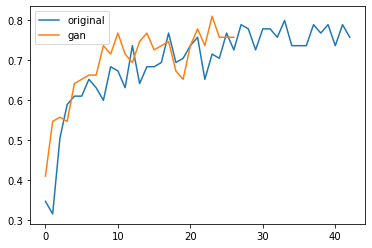

In [17]:
compared_with_without_gan()

<h2> define function to compare the accuracy of different generators </h2>

In [53]:
def compared_generators(gens,labels):
    historys = []
    for i in range(len(gens)):
        gen = gens[i]
        label = labels[i]
        train, test, val = generateDataFromDirectory(gen)
        model = build_baseline()
        history = model.fit(train, epochs=10, validation_data=val,callbacks=callback_list)
        historys.append(history)
        loss_history = pd.DataFrame(history.history)
        plt.plot(loss_history['val_accuracy'],label=label)
    plt.legend()
    plt.savefig("compared_generators_"+time.strftime("%Y%m%d-%H%M%S")+".png")

    plt.show()
    return historys

In [54]:
gens = [baselineDataGen, rescaleDataGen, rotateDataGen, zcaDataGen, allDataGen]
labels = ["baseline","rescale","rotate","zca","all"]
generators_history = compared_generators(gens,labels)

Found 324 images belonging to 12 classes.
Found 42 images belonging to 12 classes.
Found 95 images belonging to 12 classes.


ResourceExhaustedError: failed to allocate memory [Op:AddV2]

In [ ]:
#all_loss_history = pd.DataFrame(all_history.history)
#all_loss_history[['accuracy','val_accuracy']].plot()
#all_loss_history[['loss','val_loss']].plot()

https://stackoverflow.com/questions/51748514/does-imagedatagenerator-add-more-images-to-my-dataset <br />
Further, I think it's worth clarifying the meaning of "augmentation" in this context: basically we are augmenting the images when we use ImageDataGenerator and enabling its augmentation capabilities. But the word "augmentation" here does not mean, say, if we have 100 original training images we end up having 1000 images per epoch after augmentation (i.e. the number of training images does not increase per epoch). Instead, it means we use a different transformation of each image in each epoch; hence, if we train our model for, say, 5 epochs, we have used 5 different versions of each original image in training (or 100 * 5 = 500 different images in the whole training, instead of using just the 100 original images in the whole training). To put it differently, the total number of unique images increases in the whole training from start to finish, and not per epoch.

use image generator to preprocess the images can improve the fitting ability of the model, and we now will try to modify the model structure to improve the generalization ability, that is using dropout, batch normalization, and weight decay to improve the accuracy.

<h2> define function to create model and compare the accuracy of different combination of decay_rate, decay_step,and initial rate

In [10]:
def build_model_with_decay(initial_rate,decay_step, decay_rate):
    model = Sequential()

    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())

    model.add(Dense(256,activation='relu'))
    model.add(Dense(7,activation='softmax'))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_rate,
    decay_steps=decay_step,
    decay_rate=decay_rate,
    staircase=True)


    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr_schedule), metrics=['accuracy'])

    return model

In [11]:
def compared_decay_rate():
    initials = [0.001,0.0001]
    steps = [10000,100000]
    rates = [0.96]
    historys =[]
    for initial in initials:
        for step in steps:
            for rate in rates:
                train, test, val = generateDataFromDirectory(allDataGen)
                model = build_model_with_decay(initial, step, rate)
                history = model.fit(train, epochs=10, validation_data=val,callbacks=callback_list)
                historys.append(history)
                loss_history = pd.DataFrame(history.history)
                plt.plot(loss_history['val_accuracy'],label="initial: "+str(initial)+ " steps: "+str(step)+ " rate: "+str(rate))
    plt.legend()
    plt.show()
    plt.savefig("compared_decay_rate_"+time.strftime("%Y%m%d-%H%M%S")+".png")
    return historys
                

Found 129 images belonging to 7 classes.
Found 29 images belonging to 7 classes.
Found 33 images belonging to 7 classes.
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 18.9751 - accuracy: 0.2248
Epoch 00001: val_accuracy did not improve from 0.78788
9/9 [==============================] - 31s 3s/step - loss: 18.9751 - accuracy: 0.2248 - val_loss: 1.9056 - val_accuracy: 0.1212
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 1.7988 - accuracy: 0.1318
Epoch 00002: val_accuracy did not improve from 0.78788
9/9 [==============================] - 27s 3s/step - loss: 1.7988 - accuracy: 0.1318 - val_loss: 1.8791 - val_accuracy: 0.1818
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 1.6746 - accuracy: 0.2868
Epoch 00003: val_accuracy did not improve from 0.78788
9/9 [==============================] - 26s 3s/step - loss: 1.6746 - accuracy: 0.2868 - val_loss: 1.9123 - val_accuracy: 0.2727
Epoch 4/10
9/9 [==============================] - ETA: 

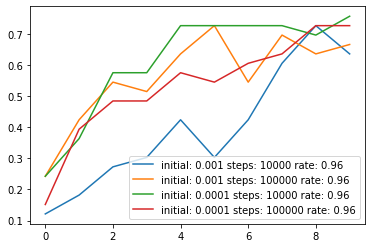

<Figure size 432x288 with 0 Axes>

In [14]:
compared_decay_rate()

<h2> define function to compare accuracy between model using decay and reduction </h2>

In [18]:
def compared_reduction_decay():
    train, test, val = generateDataFromDirectory(allDataGen)
    reduction_model = build_baseline()
    decay_model = build_model_with_decay(0.0001,10000,0.96)
    #combined_model = build_model_with_decay(0.001,10000,0.96)
    reduction_history = reduction_model.fit(train, epochs=20,validation_data=val,callbacks=callback_list_with_reduction)
    decay_history = decay_model.fit(train, epochs=10,validation_data=val,callbacks=callback_list)
    #combined_history = combined_model.fit(train, epochs=10,validation_data=val,callbacks=callback_list_with_reduction)
                
    historys = [reduction_history, decay_history]
    reduction_loss_history = pd.DataFrame(reduction_history.history)
    decay_loss_history = pd.DataFrame(decay_history.history)
    #combined_loss_history = pd.DataFrame(combined_history.history)
    plt.plot(reduction_loss_history['val_accuracy'],label="reduction")
    plt.plot(decay_loss_history['val_accuracy'],label="decay")
    #plt.plot(combined_loss_history['val_accuracy'],label="combined")
    plt.legend()
    plt.savefig("compared_reduction_rate_"+time.strftime("%Y%m%d-%H%M%S")+".png")
    plt.show()
    return historys

Found 132 images belonging to 7 classes.
Found 31 images belonging to 7 classes.
Found 34 images belonging to 7 classes.
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 15.7183 - accuracy: 0.1212
Epoch 00001: val_accuracy did not improve from 0.70588
9/9 [==============================] - 27s 3s/step - loss: 15.7183 - accuracy: 0.1212 - val_loss: 1.8250 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 1.6421 - accuracy: 0.3939
Epoch 00002: val_accuracy did not improve from 0.70588
9/9 [==============================] - 24s 3s/step - loss: 1.6421 - accuracy: 0.3939 - val_loss: 1.5315 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 1.2716 - accuracy: 0.5000
Epoch 00003: val_accuracy did not improve from 0.70588
9/9 [==============================] - 21s 2s/step - loss: 1.2716 - accuracy: 0.5000 - val_loss: 1.5634 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
9/9 [

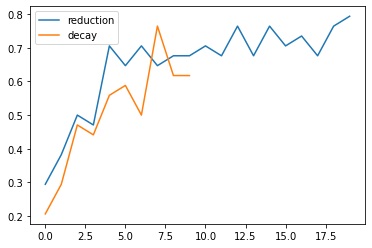

In [19]:
compared_reduction_decay()

# building the final model and evaluate it

In [ ]:
os.system("mkdir saved_models")
filepath = "saved_models/weight-model-improvement-{epoch:02d}-{val_accuracy:.2f}-"+time.strftime("%Y%m%d-%H%M%S")+".h5"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy",verbose=1,save_best_only=True, model="max", save_weights_only=False)
earlystopping = EarlyStopping(monitor="val_loss",patience=15,verbose=1,restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)
log_csv = CSVLogger("my_logs.csv",separator=',', append=False)
callback_list = [checkpoint,earlystopping,log_csv]
callback_list_with_reduction = [checkpoint,earlystopping,log_csv,reduce_lr]

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


def build_final_model():
    model = Sequential()

    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))
    model.add(BatchNormalization())


    model.add(Flatten())

    model.add(Dense(1024,activation='relu'))

    model.add(Dropout(rate=0.25))

    model.add(Dense(512,activation='relu'))

    model.add(Dense(150,activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

Found 4704 images belonging to 150 classes.
Found 616 images belonging to 150 classes.
Found 1366 images belonging to 150 classes.
Epoch 1/100
314/314 [==============================] - ETA: 0s - loss: 5.1387 - accuracy: 0.0151
Epoch 00001: val_accuracy improved from -inf to 0.01171, saving model to saved_models\weight-model-improvement-01-0.01-20211124-140751.h5
314/314 [==============================] - 100s 314ms/step - loss: 5.1387 - accuracy: 0.0151 - val_loss: 6.9178 - val_accuracy: 0.0117 - lr: 0.0010
Epoch 2/100
314/314 [==============================] - ETA: 0s - loss: 4.5109 - accuracy: 0.0317
Epoch 00002: val_accuracy improved from 0.01171 to 0.02416, saving model to saved_models\weight-model-improvement-02-0.02-20211124-140751.h5
314/314 [==============================] - 80s 255ms/step - loss: 4.5109 - accuracy: 0.0317 - val_loss: 4.9514 - val_accuracy: 0.0242 - lr: 0.0010
Epoch 3/100
314/314 [==============================] - ETA: 0s - loss: 4.1042 - accuracy: 0.0599
Epoc

314/314 [==============================] - ETA: 0s - loss: 1.6324 - accuracy: 0.5232
Epoch 00048: val_accuracy improved from 0.43411 to 0.47218, saving model to saved_models\weight-model-improvement-48-0.47-20211124-140751.h5
314/314 [==============================] - 80s 253ms/step - loss: 1.6324 - accuracy: 0.5232 - val_loss: 2.0912 - val_accuracy: 0.4722 - lr: 0.0010
Epoch 49/100
314/314 [==============================] - ETA: 0s - loss: 1.6342 - accuracy: 0.5283
Epoch 00049: val_accuracy did not improve from 0.47218
314/314 [==============================] - 78s 247ms/step - loss: 1.6342 - accuracy: 0.5283 - val_loss: 2.0590 - val_accuracy: 0.4671 - lr: 0.0010
Epoch 50/100
314/314 [==============================] - ETA: 0s - loss: 1.6300 - accuracy: 0.5249
Epoch 00050: val_accuracy did not improve from 0.47218
314/314 [==============================] - 78s 247ms/step - loss: 1.6300 - accuracy: 0.5249 - val_loss: 2.2138 - val_accuracy: 0.4590 - lr: 0.0010
Epoch 51/100
314/314 [=====

Epoch 73/100
314/314 [==============================] - ETA: 0s - loss: 0.9417 - accuracy: 0.7160
Epoch 00073: val_accuracy improved from 0.56662 to 0.56955, saving model to saved_models\weight-model-improvement-73-0.57-20211124-140751.h5
314/314 [==============================] - 80s 254ms/step - loss: 0.9417 - accuracy: 0.7160 - val_loss: 1.9876 - val_accuracy: 0.5695 - lr: 1.0000e-04
Epoch 74/100
314/314 [==============================] - ETA: 0s - loss: 0.9342 - accuracy: 0.7100 ETA: 3s - loss: 0.9361 - accuracy - ETA: 2s - loss:
Epoch 00074: val_accuracy did not improve from 0.56955
314/314 [==============================] - 78s 249ms/step - loss: 0.9342 - accuracy: 0.7100 - val_loss: 1.9426 - val_accuracy: 0.5637 - lr: 1.0000e-05
Epoch 75/100
314/314 [==============================] - ETA: 0s - loss: 0.9161 - accuracy: 0.7236
Epoch 00075: val_accuracy did not improve from 0.56955
314/314 [==============================] - 78s 248ms/step - loss: 0.9161 - accuracy: 0.7236 - val_los

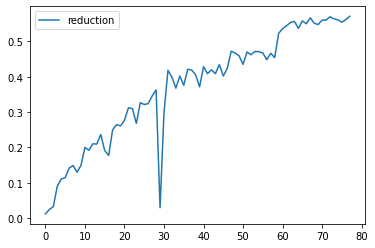

In [28]:
train, test, val = generateDataFromDirectory(allDataGen)
reduction_model = build_final_model()
reduction_history = reduction_model.fit(train, epochs=100,validation_data=val,callbacks=callback_list_with_reduction)
reduction_loss_history = pd.DataFrame(reduction_history.history)

plt.legend()
plt.savefig("final_model"+time.strftime("%Y%m%d-%H%M%S")+".png")
plt.show()

<AxesSubplot:>

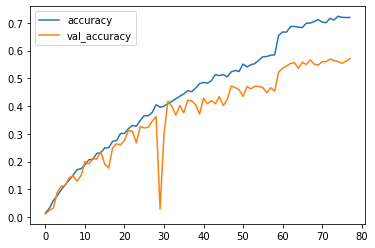

In [49]:
reduction_loss_history[["accuracy","val_accuracy"]].plot()